Optimal values (Hooke’a-Jeeves): (array([ 3.06038227, -2.60750103]), 84.88908138821417, 580)


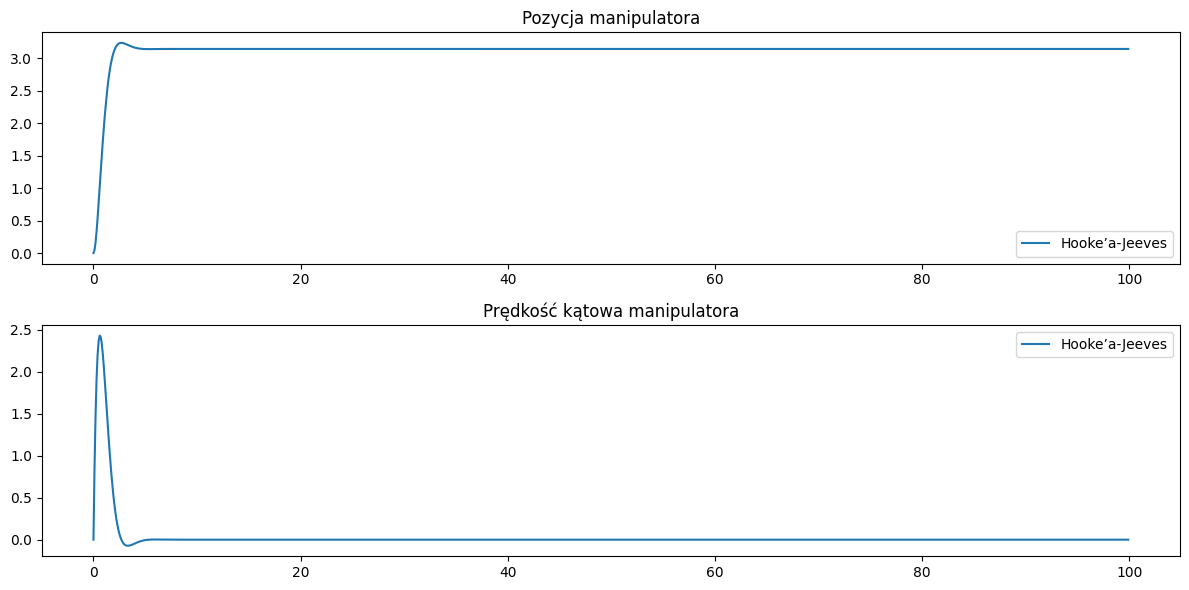

In [3]:
import numpy as np
from HJClass import HJOptimizer2
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from RosenbrockClass import RosenbrockOptimizer

def model(y, t, k1, k2):
    alpha, omega = y
    dydt = [omega, k1 * (np.pi - alpha) + k2 * omega]
    return dydt

def objective_function(k_values):
    k1, k2 = k_values
    t_span = np.arange(0, 100, 0.1)
    initial_conditions = [0, 0]
    solution = odeint(model, initial_conditions, t_span, args=(k1, k2))
    Q = np.trapz((10 * (np.pi - solution[:, 0])**2 + solution[:, 1]**2 + (k1 * (np.pi - solution[:, 0]) + k2 * solution[:, 1])**2), t_span)
    return Q

starting_point_hj = np.array([0, 0])
step_length_hj = 0.1
reduction_factor_hj = 0.5
epsilon_hj = 1e-8 
max_function_calls_hj = 1000

hj_optimizer = HJOptimizer2(starting_point_hj, step_length_hj, reduction_factor_hj, epsilon_hj, max_function_calls_hj, objective_function)
rc_optimizer = RosenbrockOptimizer(
    x0=np.array([0.0, 0.0]),  
    s0=np.array([0.1, 0.1]), 
    alfa=1.3,                 
    beta=0.5,                 
    epsilon=1e-6,             
    Nmax=1000,                 
    fun=  objective_function,
    mode='plot'        )
result_hj = hj_optimizer.optimize()
print("Optimal values (Hooke’a-Jeeves):", result_hj)

t_span = np.arange(0, 100, 0.1)
initial_conditions_hj = [0, 0]
solution_hj = odeint(model, initial_conditions_hj, t_span, args=(result_hj[0][0], result_hj[0][1]))

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t_span, solution_hj[:, 0], label='Hooke’a-Jeeves')
plt.title('Pozycja manipulatora')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_span, solution_hj[:, 1], label='Hooke’a-Jeeves')
plt.title('Prędkość kątowa manipulatora')
plt.legend()

plt.tight_layout()
plt.show()

Optimal values (Rosenbrock): [ 3.06038695 -2.60750341]


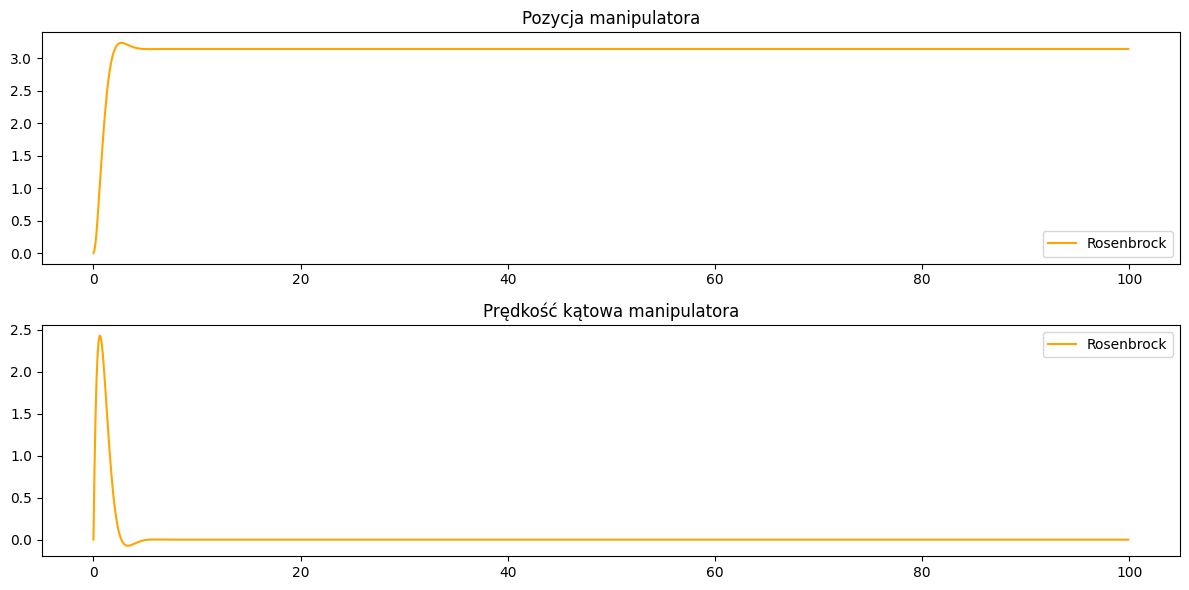

In [6]:
rc_optimizer = RosenbrockOptimizer(
    x0=np.array([0.0, 0.0]),  
    s0=np.array([0.1, 0.1]), 
    alfa=1.3,                 
    beta=0.5,                 
    epsilon=1e-6,             
    Nmax=1000,                 
    fun=  objective_function,
    mode='plot'        )
result_rc = rc_optimizer.optimize() 
print("Optimal values (Rosenbrock):", result_rc.x)

t_span = np.arange(0, 100, 0.1)
initial_conditions_hj = [0, 0]
solution_rc = odeint(model, initial_conditions_hj, t_span, args=(result_rc.x[0], result_rc.x[1]))

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t_span, solution_rc[:, 0], label='Rosenbrock', c='orange')
plt.title('Pozycja manipulatora')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_span, solution_rc[:, 1], label='Rosenbrock',c='orange')
plt.title('Prędkość kątowa manipulatora')
plt.legend()

plt.tight_layout()
plt.show()

In [47]:
solution_rc[:, 1].shape, solution_rc[:, 0].shape

((60,), (60,))

In [40]:
solution_rc[:60]

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 4.40424045e-02,  8.42014768e-01],
       [ 1.61209088e-01,  1.46813914e+00],
       [ 3.31567729e-01,  1.91110134e+00],
       [ 5.38331692e-01,  2.20103935e+00],
       [ 7.67589107e-01,  2.36528547e+00],
       [ 1.00801683e+00,  2.42827595e+00],
       [ 1.25059052e+00,  2.41155908e+00],
       [ 1.48829951e+00,  2.33387903e+00],
       [ 1.71587299e+00,  2.21131578e+00],
       [ 1.92952227e+00,  2.05746460e+00],
       [ 2.12670244e+00,  1.88364099e+00],
       [ 2.30589526e+00,  1.69909989e+00],
       [ 2.46641425e+00,  1.51125998e+00],
       [ 2.60823233e+00,  1.32592583e+00],
       [ 2.73183110e+00,  1.14750233e+00],
       [ 2.83807121e+00,  9.79197671e-01],
       [ 2.92808218e+00,  8.23211755e-01],
       [ 3.00317040e+00,  6.80908546e-01],
       [ 3.06474336e+00,  5.52971275e-01],
       [ 3.11424867e+00,  4.39540332e-01],
       [ 3.15312594e+00,  3.40334090e-01],
       [ 3.18276992e+00,  2.54753336e-01],
       [ 3.

In [30]:
import numpy as np
from scipy.optimize import minimize

class RosenbrockOptimizer:
    def __init__(self, x0, s0, alfa, beta, epsilon, Nmax, fun, mode = None):
        self.x0 = x0
        self.s0 = s0
        self.alfa = alfa
        self.beta = beta
        self.epsilon = epsilon
        self.Nmax = Nmax
        self.fun = fun
        self.counter = 0
        self.mode = mode

    def norm(self, A):
        return np.linalg.norm(A)

    def funkcja(self, x):
        self.counter += 1
        return self.fun(x)

    def optimize(self):
        if self.mode:
            return  minimize(self.fun, starting_point_hj, method='BFGS')
        n = len(self.x0)
        l = np.zeros(n)
        p = np.zeros(n)
        s = np.copy(self.s0)
        D = np.eye(n)
        x = np.copy(self.x0)

        while True:
            for i in range(n):
                xt = x + s * D[:, i]
                if self.funkcja(xt) < self.funkcja(x):
                    x = xt
                    l[i] += s
                    s *= self.alfa
                else:
                    p[i] += 1
                    s *= -self.beta

            change = any(p[i] != 0 and l[i] != 0 for i in range(n))

            if change:
                Q = np.outer(l, np.ones(n))
                Q *= D
                D = Q
                for i in range(1, n):
                    temp = np.dot(Q[:, i], D[:, :i])
                    D[:, i] = Q[:, i] - temp

                s = max(s * self.alfa, 1e-6)
                l = np.zeros(n)
                p = np.zeros(n)

            max_s = np.max(np.abs(s))

            if max_s < self.epsilon or self.counter > self.Nmax:
                return x, self.funkcja(x), self.counter

# Пример использования для вашей задачи
# Предположим, у вас есть функция `your_function(x)`, которую вы хотите оптимизировать.
# Создаем экземпляр оптимизатора
optimizer = RosenbrockOptimizer(
    x0=np.array([0.0, 0.0]),  # начальное приближение
    s0=np.array([0.1, 0.1]),  # начальный шаг
    alfa=1.3,                  # коэффициент увеличения шага
    beta=0.5,                  # коэффициент уменьшения шага
    epsilon=1e-6,              # критерий остановки
    Nmax=1000,                 # максимальное количество итераций
    fun=  objective_function,
    mode='plot'        # ваша оптимизируемая функция
)

# Запускаем оптимизацию
result = optimizer.optimize()
print("Optimal solution:", result.x[0])
print("Optimal value:", result.x[1])
# print("Number of iterations:", result[2])


Optimal solution: 3.060384799947412
Optimal value: -2.607502504868742
